In [5]:
import networkx as nx
import matplotlib.pyplot as plt

from src.models.city_list import CityList
from src.models.fleet import Fleet
from src.algorithms.simulated_annealing import SimulatedAnnealing

city_list = CityList.from_csv('./data/orders_multiple_depots.csv')
fleet = Fleet(num_vehicles=5, vehicle_capacity=1000, city_list=city_list)
SA = SimulatedAnnealing(fleet=fleet, epochs=15, attempts=5, initial_temp=100,
                        cooling_rate=0.9, annealing_method='nearest_neighbor',
                        store_solutions=True)

In [6]:
solution = SA.optimize()
print(SA)

-----------Simulated Annealing Algorithm-----------
Anneling Method      : nearest_neighbor
Current Temperature  : 20.59
Initial Temperature  : 100
Cooling Factor       : 0.9
Epochs               : 15
Attempts             : 5
Fleet size           : 5
Vehicle Capacity     : 500
Total Locations      : 31
Total Depots         : 2
Initial Shortest     : 10937.291
Current Shortest     : 7672.018
---------------------------------------------------


In [7]:
# print routes
print('Total distance covered:', solution.distance_covered)
for vehicle in solution:
    print(f'Vehicle: {id(vehicle)}')
    for route in vehicle.route_list:
        print(route)

Total distance covered: 7672.018
Vehicle: 2065710676624
Order: 500 | Length: 581.8647381807009 | Kraków (0) -> Białystok (500) -> Warszawa (0)
Order: 300 | Length: 813.1377458146231 | Warszawa (0) -> Gdynia (100) -> Gdańsk (200) -> Kraków (0)
Order: 400 | Length: 297.03736343204355 | Kraków (0) -> Chrzanów (400) -> Warszawa (0)
Order: 400 | Length: 752.0588514739375 | Warszawa (0) -> Malbork (100) -> Olsztyn (300) -> Kraków (0)
Vehicle: 2065710675952
Order: 400 | Length: 489.0470832696128 | Kraków (0) -> Nowy Targ (120) -> Zakopane (200) -> Bielsko-Biała (50) -> Kielce (30) -> Warszawa (0)
Order: 350 | Length: 1002.7180665087458 | Warszawa (0) -> Gromnik (200) -> Szczecin (150) -> Kraków (0)
Vehicle: 2065710677104
Order: 470 | Length: 724.9397864589295 | Warszawa (0) -> Puławy (200) -> Lublin (60) -> Rzeszów (60) -> Krosno (60) -> Wieliczka (90) -> Warszawa (0)
Vehicle: 2065710668224
Order: 260 | Length: 413.96459975730113 | Kraków (0) -> Radom (100) -> Łódź (160) -> Warszawa (0)
Order

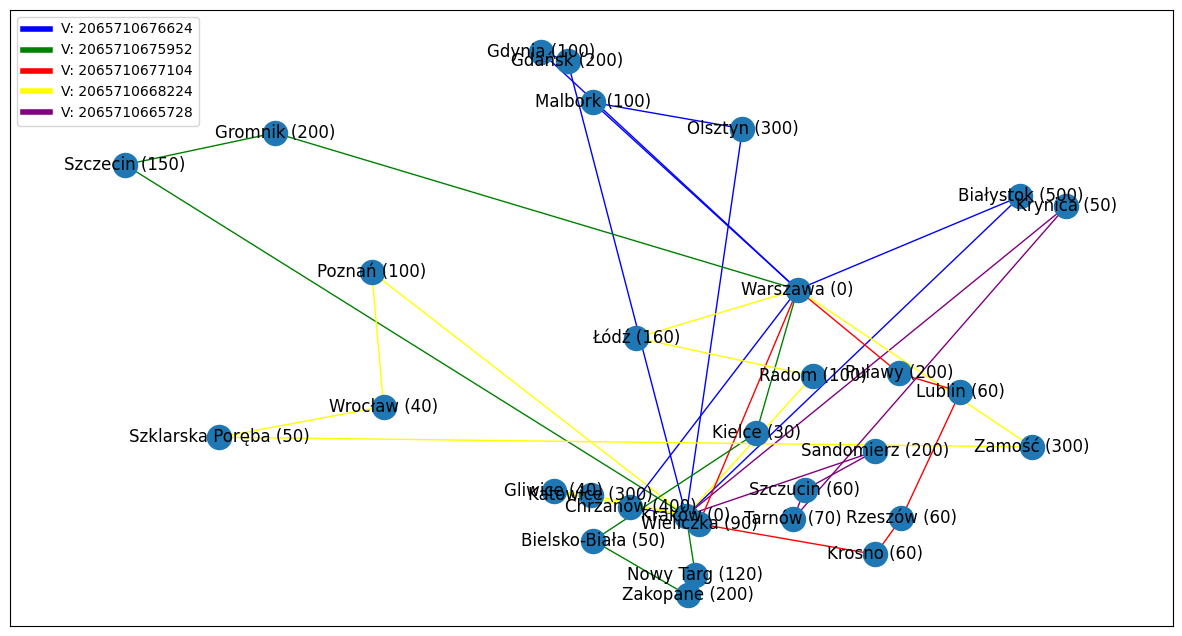

In [8]:
def generate_nx_graph(fleet):
    # Create a new graph
    plt.figure(figsize=(15, 8))
    G = nx.Graph()

    # Map for vehicle colors
    vehicle_colors = {}
    colors = ['blue', 'green', 'red', 'yellow', 'purple', 'orange']
    color_index = 0

    for vehicle in fleet:
        # Assign a color for each vehicle
        vehicle_color = colors[color_index % len(colors)]
        vehicle_colors[vehicle] = vehicle_color
        color_index += 1

        for route in vehicle.route_list:
            previous_city = None
            for city in route:
                # Add node for each city with its geographical position
                G.add_node(city.name, pos=(city.lon, city.lat), label=f"{city.name} ({city.order})")

                # Add edge if previous city exists
                if previous_city:
                    # Optionally, you can calculate the distance between cities to set as weight
                    G.add_edge(previous_city.name, city.name, color=vehicle_color)
                previous_city = city

    # Position nodes based on geographical coordinates
    pos = nx.get_node_attributes(G, 'pos')

    # Draw the graph
    # Draw nodes with positions
    nx.draw_networkx_nodes(G, pos)

    # Draw edges with different colors
    for edge in G.edges(data=True):
        nx.draw_networkx_edges(G, pos, edgelist=[(edge[0], edge[1])], edge_color=edge[2]['color'])

    # Draw labels
    nx.draw_networkx_labels(G, pos, {n: d['label'] for n, d in G.nodes(data=True)})

    # Create a legend for vehicles
    vehicle_legend = [plt.Line2D([0], [0], color=color, lw=4) for color in vehicle_colors.values()]
    plt.legend(vehicle_legend, [f"V: {id(v)}" for v in vehicle_colors.keys()], loc='upper left')

    plt.axis('equal')  # Set equal scaling by x and y axes for correct geographical representation
    plt.show()

generate_nx_graph(solution)
